# Mountain Hub API sample request using `mtnhubsnow` package
1/7/2021

`mtnhubsnow` is a Mountain Hub API client. This example consists of a data request from a region in Alaska, specifying a start date.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import geopandas as gpd
import folium

import mtnhubsnow as mh

## Sample Query
Use the `mtnhubsnow.snow_data` function to request data from the MountainHub API. Specify a large `limit` parameter value, `start` date (from `start` to the present), and a geographical bounding box.

In [2]:
mh.snow_data?

Signature:
mh.snow_data(
    publisher='all',
    obs_type='snow_conditions,snowpack_test',
    limit=1000,
    start=None,
    end=None,
    bbox=None,
    filter=True,
)
Docstring:
Retrieves snow data from MountainHub API.

Keyword arguments:
publisher -- 'all', 'pro' (professional submitters), etc
obs_type -- Filters to only specific observation types.
    Can be an individual value or a comma-separated string of multiple values.
    Only snow depth values are processed, but accepted obs_type values are:
    snowpack_test, snow_conditions, weather, camera, dangerous_wildlife,
    other_hazard, point_of_interest, water_hazard, trail_conditions,
    trip_report, incident, avalanche
limit -- Maximum number of records to return (default 1000)
start -- Start datetime to return results from, as datetime object
end -- End datetime to return results from, as datetime object
box -- Bounding box to restrict results, specified as dictionary with items
    latmax, lonmax, latmin, lonmin
filter 

In [3]:
# Search Area -- a region in Alaska
region = {
    'latmax' : 75,
    'latmin' : 54,
    'lonmax': -140,
    'lonmin': -170,
}

In [4]:
obs = mh.snow_data(limit=10000000, start=datetime(2019,11,9), bbox=region)

In [5]:
len(obs)

300

## Explore the resulting Pandas dataframe

In [6]:
obs.obs_type.value_counts()

snow_conditions    285
snowpack_test       15
Name: obs_type, dtype: int64

The timestamps returned (`datetime_utc`) are in UTC. `snow_depth` values are in meters.

In [7]:
obs.tail(10)

,id,datetime_utc,latitude,longitude,author_name,obs_type,snow_depth,description
332,5dd32dd8991f631a41d1ff35,2019-11-18 23:48:03.886000+00:00,64.859804,-147.847421,Jessica Landry,snow_conditions,32.999999,
333,5dd32e23991f631a41d1ff52,2019-11-18 23:47:49.847000+00:00,64.860546,-147.846669,Chris,snowpack_test,43.000000,
334,5dd32d8a24869802b91e7be9,2019-11-18 23:47:12.920000+00:00,64.859774,-147.847815,Sara Church,snow_conditions,29.999999,
335,5dd32d6524869802b91e7bba,2019-11-18 23:46:38.088000+00:00,64.860582,-147.846802,Chris,snowpack_test,43.000000,
337,5dd32e0a24869802b91e7c65,2019-11-18 23:46:08.250000+00:00,64.859848,-147.848071,Nancy Fresco,snow_conditions,24.999999,
338,5dd32d5b991f631a41d1fea6,2019-11-18 23:46:00.320000+00:00,64.860007,-147.846720,Chris,snowpack_test,43.000000,
339,5dd32deb24869802b91e7c5a,2019-11-18 23:45:37.788000+00:00,64.859789,-147.848002,Nancy Fresco,snow_conditions,28.999999,
340,5dcb65abc2cf0772269a65a7,2019-11-13 02:08:16.357000+00:00,62.500289,-150.327500,Mike Miller,snow_conditions,2.540000,SAAW2019.
341,5dc9eccf1382367426ce8ad5,2019-11-11 23:20:15.538000+00:00,65.046278,-147.416950,Katreen Wikstrom Jones,snow_conditions,75.000000,
342,5dc746b30eec241c400f95f6,2019-11-09 23:07:22.745000+00:00,61.798464,-149.279611,Katreen Wikstrom Jones,snow_conditions,101.000000,


In [8]:
obs_saaw2019 = obs[obs.description.str.contains("SAAW2019")]

In [9]:
len(obs_saaw2019)

9

In [10]:
obs_saaw2019

,id,datetime_utc,latitude,longitude,author_name,obs_type,snow_depth,description
304,5ddadde6281f54198817401c,2019-11-24 19:45:02.222000+00:00,61.251822,-149.513328,Emily Baker,snow_conditions,45.00,SAAW2019
306,5dd9d5aa1bbaa50474c07c9b,2019-11-24 00:57:37.458000+00:00,61.235399,-149.617811,Emily Baker,snow_conditions,0.00,SAAW2019
307,5dd9d5a600793c7c47e89afa,2019-11-24 00:44:14.999000+00:00,61.233255,-149.579530,Emily Baker,snow_conditions,3.00,"SAAW2019 3 cm total low density new fluff, may..."
308,5dd9d1fc7a711870a3d9bccf,2019-11-24 00:17:25.255000+00:00,61.246685,-149.534172,Emily Baker,snow_conditions,40.00,SAAW2019
309,5dd9d21a1bbaa50474c07aca,2019-11-24 00:11:59.775000+00:00,61.248577,-149.528851,Emily Baker,snow_conditions,5.00,SAAW2019
310,5dd9c9d61bbaa50474c07789,2019-11-24 00:07:12.002000+00:00,61.252118,-149.518262,Emily Baker,snow_conditions,16.00,SAAW2019
311,5dd9c8e81bbaa50474c076e7,2019-11-23 23:57:40.820000+00:00,61.253634,-149.508786,Emily Baker,snow_conditions,85.00,SAAW2019
312,5dd9c5b500793c7c47e893e6,2019-11-23 23:49:34.526000+00:00,61.250950,-149.507558,Emily Baker,snow_conditions,12.00,SAAW2019
340,5dcb65abc2cf0772269a65a7,2019-11-13 02:08:16.357000+00:00,62.500289,-150.327500,Mike Miller,snow_conditions,2.54,SAAW2019.


In [11]:
obs.author_name.value_counts()

Erin Mckittrick            97
Gabriel Wolken             38
Katreen Wikstrom Jones     31
Joseph Kurtak              26
Emily Baker                13
Sarah Carter               12
Chris                      10
James D Smith               9
Jessica Landry              8
Bobby Liebs                 8
Corbin Knapp                5
Maggie House                5
William Samuel              5
Ryan Cunningham             4
Nancy Fresco                4
William Olofsson            3
Jane Wolken                 3
Klay Baker                  3
Julie Carpenter             3
Stevi Schmierer             2
Marvin Turner               2
Tamra Jones                 1
Mike Miller                 1
Libby Scott                 1
Michael Olive               1
Brandon Marshall            1
Bob Torgerson               1
Kaden Fitzgerald Addler     1
Mike Delue                  1
Sara Church                 1
Name: author_name, dtype: int64

Use the dataframe `to_csv` method to export to a `csv` file:
```python
obs.to_csv('mountainhub_data_export.csv', index=False)
```

## Convert into a GeoPandas GeoDataframe and map observations using Folium

Create a GeoDataframe from the `obs` Dataframe

In [12]:
obs_gdf = gpd.GeoDataFrame(obs, geometry=gpd.points_from_xy(obs['longitude'], obs['latitude']), crs='epsg:4326')

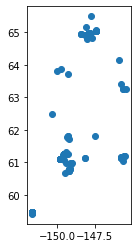

In [13]:
obs_gdf.plot();

Map the observations in an interactive Folium map, with clickable markers colored by observation type (blue for `snow_conditions` and green for `snowpack_test`).

In [14]:
m = folium.Map(tiles='Stamen terrain')

In [15]:
for idx, row in obs_gdf.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], 
                  icon=folium.Icon(color='blue' if row['obs_type'] == 'snow_conditions' else 'green'),
                  popup="<b>{0}: {1:.1f} m</b></br>{2}. Observation type: {3}</b> {4}".format(
                      row['datetime_utc'], row['snow_depth'], 
                      row['author_name'], row['obs_type'], row['description'])
                 ).add_to(m)

# Set the map extent (bounds) to the extent of the sites
m.fit_bounds(m.get_bounds())

m